In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import t
#import sympy as sym
from sklearn.metrics import r2_score
from scipy.special import erf
plt.rcParams['font.family']='serif'

In [27]:
Npixeles=256
NI=1 #Número de imágenes RAW
NF=1 #Número de imágenes FF
NThr=1 #Número de imágenes contenidas dentro de cada .raw: La primera es la dada por el canal 0 y la segunda es la dada por el canal 1.
nameSAM="SVsp450_07_9.25_kev__d0.1m_a15um_p62um_step-4.2_dith23.25_"
nameREF ="R10_00_19.25_kev__d0.1m_a15um_p62um_step-4.2_dith23.25_" 
nameFF="FF10_00_19.25_kev__d0.1m_a15um_p62um_step-4.2_dith23.25_"


In [28]:
def PI2(name):
    P=np.zeros(256)
    for i in range(len(name)):
        P=P+name[i,:]
    mean=P/len(name)
    return mean
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

def func(x, A, n, m, b):
    k = A*erf((x-n)/(np.sqrt(2)*b))+m
    return k
def derfunc(x, A, n, b):
    k=A*np.sqrt(2/np.pi)*np.exp(-(x-n)**2/(2*b**2))/b
    return k
def func2(x,A,B):
    y = A/x + B
    return y
def exponential(x,a,b):
    y = a*np.exp(-x * b) 
    return y
def exponential2(x,a,b,c):
    y = a*np.exp(x*b)+c
    return y
def Lineal(x,a,b):
    y = a*x + b
    return y
def Cuadratic(x,a,b,c):
    y = a*x**b +c 
    return y


In [29]:
def ImagenesR(name,Npixeles):
    I=[]
    for k in range(0,len(name),Npixeles*Npixeles):
        Im=np.zeros((Npixeles,Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j,i]=name[i+Npixeles*j+k]
        I.append(Im)
    return I
def Imagenes(name,Npixeles,NI):
    D=[]
    for i in range(1,NI+1):
        Raw=np.fromfile(name+"{}.raw".format(i), dtype='float32')
        K=ImagenesR(Raw,Npixeles)
        D.append(K)
    return D
def ImagenesA(name,Npixeles,NI,NThr):
    A=[]
    for i in range(NThr):
        Mean=np.zeros((Npixeles, Npixeles))
        for j in range (NI):
            Mean=Mean+name[j][i]
        A.append(Mean)
    return A
def CNR(meanS,meanB,stdB):
    CNR = (meanB - meanS)/stdB
    return CNR
SAMP=Imagenes(nameSAM,Npixeles,NI)
SAMPA=ImagenesA(SAMP,Npixeles,NI,NThr)
REF=Imagenes(nameREF,Npixeles,NI)
REFA=ImagenesA(REF,Npixeles,NI,NThr)
FF=Imagenes(nameFF,Npixeles,NF)
FFA=ImagenesA(FF,Npixeles,NF,NThr)

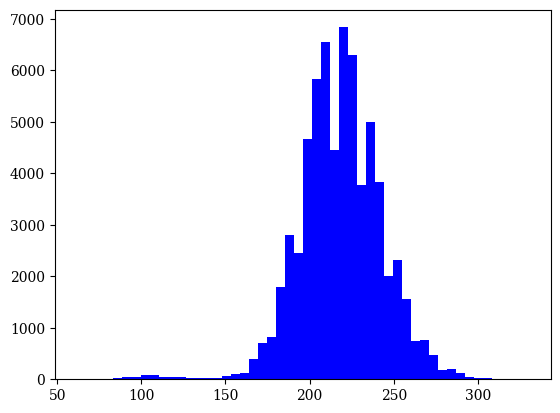

In [30]:
Sampc=[]
Refc=[]
for i in range(NThr):
    SAMPC=SAMPA[i]#/FFA[i]
    REFC = REFA[i]/FFA[i]
    Sampc.append(SAMPC)
    Refc.append(REFC)
    
k=0
ImG=plt.hist(np.ravel(Sampc[k]),bins=50,color="blue")

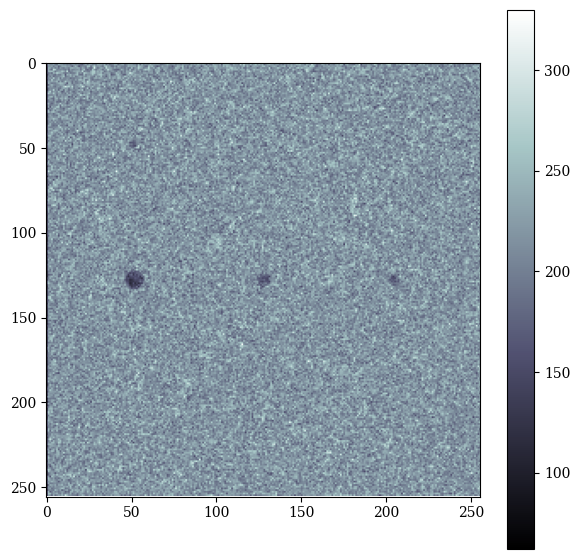

In [31]:
plt.figure(figsize=(7,7))
plt.imshow(Sampc[k], cmap="bone")
plt.colorbar()